# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 GrabCut Algorithm for Background Removal</h2>

<h5 style="margin-top:5px;">In this lesson we'll use the GrabCut Algorithm for background Removal</h5>

In [3]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import dlib
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [1]:
!wget https://raw.githubusercontent.com/rajeevratan84/moderncomputervision/main/woman.jpeg

--2026-01-03 13:08:06--  https://raw.githubusercontent.com/rajeevratan84/moderncomputervision/main/woman.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17368 (17K) [image/jpeg]
Saving to: ‘woman.jpeg’

woman.jpeg          100%[===================>]  16.96K  --.-KB/s    in 0.003s  

2026-01-03 13:08:06 (6.59 MB/s) - ‘woman.jpeg’ saved [17368/17368]



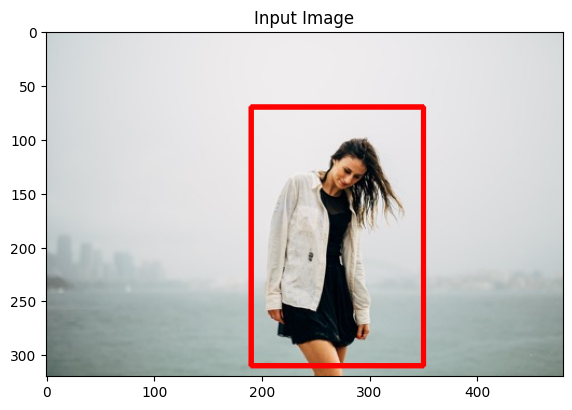

In [4]:
# Load our image
image = cv2.imread('../images/woman.jpeg')
copy = image.copy()
# Create a mask (of zeros uint8 datatype) that is the same size (width, height) as our original image
mask = np.zeros(image.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Needs to be set Manually or selected with cv2.selectROI()
x1, y1, x2, y2 = 190, 70, 350, 310
start = (x1, y1)
end = (x2, y2)

# Format is X, Y, W, H
rect = (x1, y1, x2-x1, y2-y1)

# Show rectangle
cv2.rectangle(copy, start, end, (0, 0, 255), 3)
imshow("Input Image", copy)


### **Grabcut Arguments** ###
##### **img** - Input image #####
##### **mask** - It is a mask image where we specify which areas are background, foreground or probable background/foreground etc. It is done by the following flags, cv.GC_BGD, cv.GC_FGD, cv.GC_PR_BGD, cv.GC_PR_FGD, or simply pass 0,1,2,3 to image #####
##### **rect** - It is the coordinates of a rectangle which includes the foreground object in the format (x, y, w, h) #####
##### **bdgModel, fgdModel** - These are arrays used by the algorithm internally. You just create two np.float64 type zero arrays of size (1,65) #####
##### **iterCount** - Number of iterations the algorithm should run #####
##### **mode** - It should be cv.GC_INIT_WITH_RECT or cv.INIT_WITH_MASK or combined which decides whether we are drawing rectangle or final touchup strokes. #####

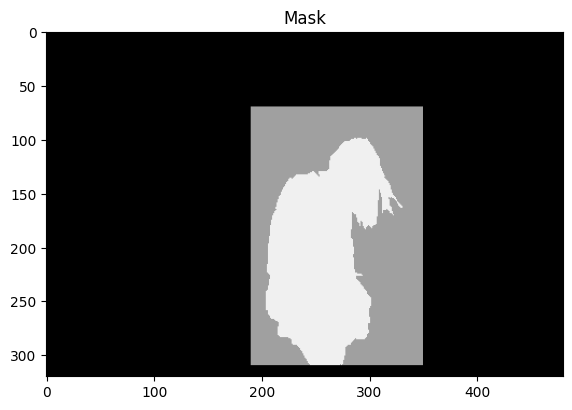

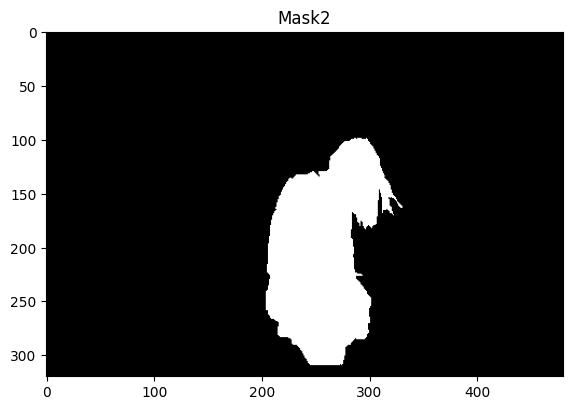

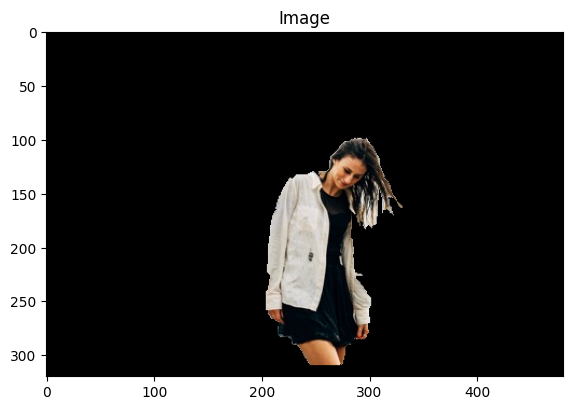

In [5]:
# Let the algorithm run for 5 iterations. Mode should be cv.GC_INIT_WITH_RECT since we are using rectangle.
# Grabcut modifies the mask image.
# In the new mask image, pixels will be marked with four flags denoting background/foreground as specified above.
# So we modify the mask such that all 0-pixels and 2-pixels are put 0 (i.e., background) and all 1-pixels and 2-pixels are put to 1 (i.e., foreground pixels).
# Now our final mask is ready. Multiply it with input image to get the segmented image.
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2) | (mask==0),0,1).astype('uint8')
image = image * mask2[:,:,np.newaxis]

imshow("Mask", mask * 80)
imshow("Mask2", mask2 * 255)
imshow("Image", image)